In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [52]:
dt = pd.read_csv('Advertising.csv')
dt.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [53]:
pd.DataFrame(dt.isnull().sum(), columns = ["Null values Count"]).T

,Unnamed: 0,TV,Radio,Newspaper,Sales
Null values Count,0,0,0,0,0


In [54]:
dt.describe(include='all')

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Exploratory Data Analysis

<AxesSubplot:xlabel='TV', ylabel='Sales'>

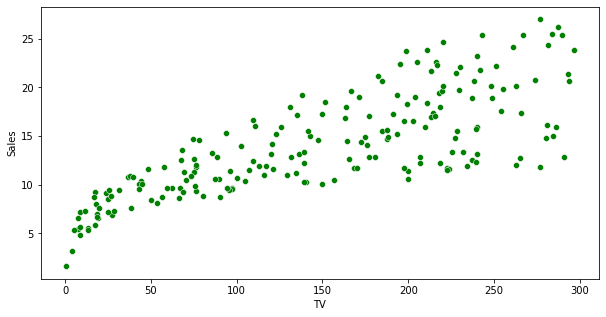

In [56]:
a = dt["TV"]
b = dt["Sales"]
plt.figure(figsize = (10,5))
sns.scatterplot(a, b, color='green')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

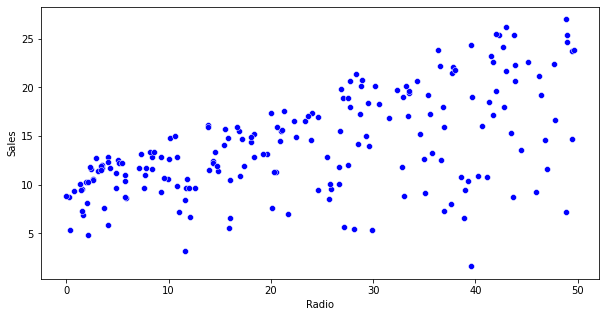

In [57]:
a = dt["Radio"]
b = dt["Sales"]
plt.figure(figsize = (10,5))
sns.scatterplot(a, b, color='blue')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

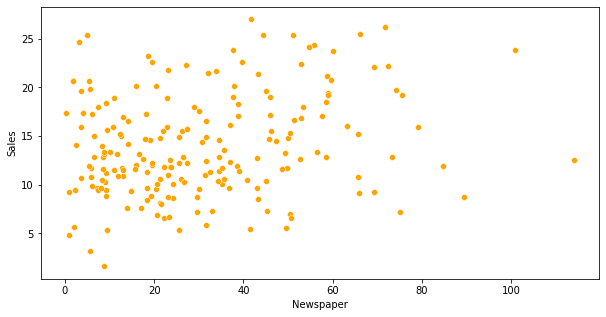

In [58]:
a = dt["Newspaper"]
b = dt["Sales"]
plt.figure(figsize = (10,5))
sns.scatterplot(a, b, color='orange')

# Displot of the data

<Figure size 720x360 with 0 Axes>

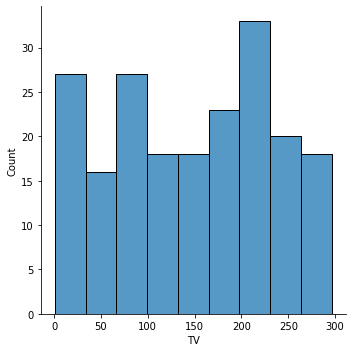

In [59]:
plt.figure(figsize = (10,5))
sns.displot(dt['TV'])

<Figure size 720x360 with 0 Axes>

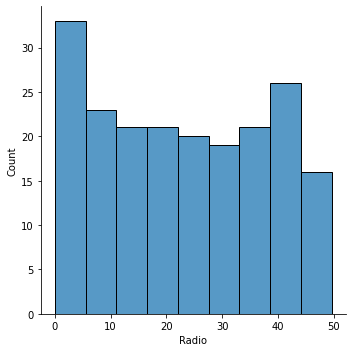

In [60]:
plt.figure(figsize = (10,5))
sns.displot(dt['Radio'])

<Figure size 720x360 with 0 Axes>

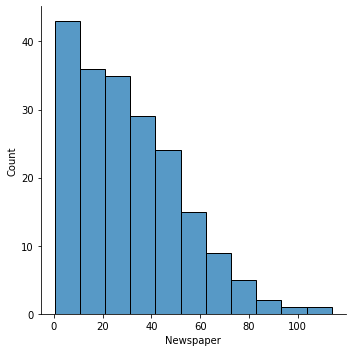

In [61]:
plt.figure(figsize = (10,5))
sns.displot(dt['Newspaper'])

<Figure size 720x360 with 0 Axes>

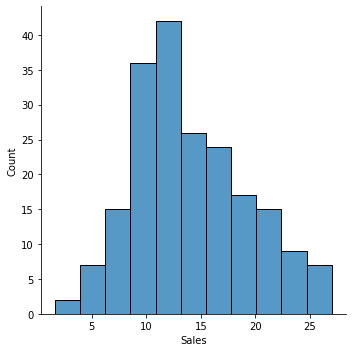

In [62]:
plt.figure(figsize = (10,5))
sns.displot(dt['Sales'])

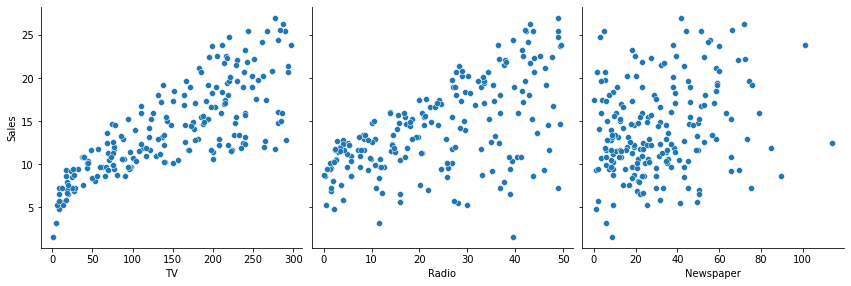

In [63]:
sns.pairplot(dt, x_vars = ['TV' , 'Radio', 'Newspaper'], y_vars = ['Sales'], height=4, aspect=1)
plt.show()

<AxesSubplot:>

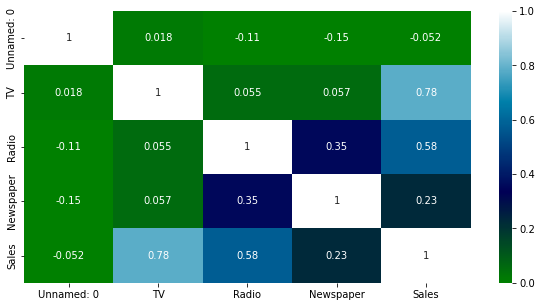

In [64]:
plt.figure(figsize=(10,5))
sns.heatmap(dt.corr(), annot = True, vmin = 0, vmax = 1, cmap = 'ocean')

# Statistical Data

In [65]:
dt.std()

Unnamed: 0    57.879185
TV            85.854236
Radio         14.846809
Newspaper     21.778621
Sales          5.217457
dtype: float64

In [66]:
dt.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [67]:
dt.var()

Unnamed: 0    3350.000000
TV            7370.949893
Radio          220.427743
Newspaper      474.308326
Sales           27.221853
dtype: float64

In [68]:
dt.mean()

Unnamed: 0    100.5000
TV            147.0425
Radio          23.2640
Newspaper      30.5540
Sales          14.0225
dtype: float64

In [69]:
dt.median()

Unnamed: 0    100.50
TV            149.75
Radio          22.90
Newspaper      25.75
Sales          12.90
dtype: float64

# Model Building and Predicting the value

In [70]:
X = dt[['TV']]
Y = dt["Sales"]
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 50)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.intercept_


6.845633135106893

In [71]:
lr.coef_

array([0.04992806])

In [72]:
print("LR model is Y = ",lr.intercept_, " + ", lr.coef_, "radio")
lr.score(X_train, Y_train)
lr.score(X_test, Y_test)
Y_pred = lr.predict(X_test)
Y_pred 

LR model is Y =  6.845633135106893  +  [0.04992806] radio


array([15.61799312, 18.55376299,  8.03392094, 13.30632398, 11.64871242,
       17.74992124, 18.43393565,  7.27501444, 18.22923061, 11.25428075,
       18.81838171, 15.68289959, 17.67003635, 15.45822333, 19.97171987,
       13.59590672, 12.88692829, 18.24420903,  8.99253968, 13.42115852,
       12.32773402, 10.60521598,  9.95615122, 17.94963348, 20.51094291,
       10.26071238, 11.35912968, 11.62374839, 16.07733126, 17.17075576,
       12.99177721, 14.32485639,  7.68941733, 16.71141761, 10.66013685,
        9.07741738, 11.9732448 , 19.96173426, 11.19935989, 10.66013685])

In [73]:
diff = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
diff.head(6)

,Actual,Predicted
112,14.1,15.617993
165,11.9,18.553763
12,9.2,8.033921
73,11.0,13.306324
144,11.4,11.648712
20,18.0,17.749921


In [74]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [75]:
R2 = r2_score(Y_test, Y_pred)
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

print('Accuracy = ', R2.round(2)*100, '%')
print('mae = ',mae.round(2))
print('mse = ',mse.round(2))
print('rmse = ',rmse.round(2))

Accuracy =  30.0 %
mae =  2.4
mse =  9.98
rmse =  3.16


# Accuracy of Linear Reg on the given Dataset

<AxesSubplot:xlabel='Sales'>

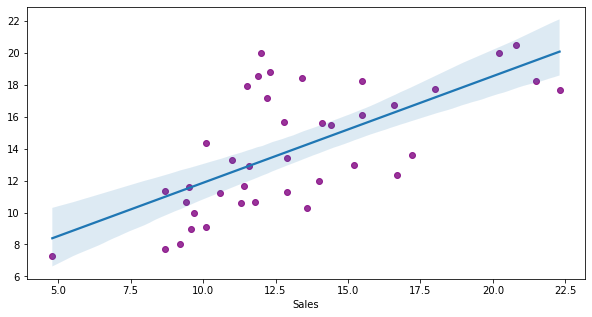

In [76]:
plt.figure(figsize = (10,5))
sns.regplot(x = Y_test, y = Y_pred, scatter_kws = {'color': 'purple'})